# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.
* There is no strong relationship between latitude and humidity. The graph below show a great variety of values at similar latitudes.
* During February, the temperature is cooler in the Northern hemisphere, where latitudes are greater than 0 and the temperature is warmer in the Southern hemisphere, where latitudes are less than 0.
* There is a relatively strong correlation bewteen latitude and temperature. The lower latitudes have higher temperatures and the higher latitudes have lower temperatures.
---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [30]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # Replace spaces with %20 to create a correct URL
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [31]:
# Open WeatherMap API Key
api_key = api_keys.api_key

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Create empty lists to append the API data into lists
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Record counter
record_count = 1
set_count = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#test_cities = ["Pakris", "London", "Oslo", "Beijing"]
# Loop through the list of cities and perform a request for data on each
for city in cities:
    
    response = requests.get(query_url + city).json()
    #print(query_url + city)
    # print(response)
    try:
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        
        print(f"Processing Record {record_count} of Set {set_count} | " + str(response["id"]) + " | " + response["name"])
        
        # Increase counter by one until 50
        record_count += 1
        
        if record_count > 50:
            record_count = 0
            # Increase set count by one
            set_count += 1
         
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)

     # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue   

print(f"-------------------------------")         
print(f"Data Retrieval Complete")
print(f"-------------------------------")              
        

    



Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | 964432 | Port Alfred
Processing Record 2 of Set 1 | 6185377 | Yellowknife
Processing Record 3 of Set 1 | 5690532 | Minot
Processing Record 4 of Set 1 | 6201424 | Mataura
Processing Record 5 of Set 1 | 4020109 | Atuona
Processing Record 6 of Set 1 | 3631878 | Moron
Processing Record 7 of Set 1 | 1273574 | Vaini
Processing Record 8 of Set 1 | 5294810 | Flagstaff
Processing Record 9 of Set 1 | 3671497 | Puerto Colombia
Processing Record 10 of Set 1 | 2125693 | Evensk
Processing Record 11 of Set 1 | 934322 | Mahebourg
Processing Record 12 of Set 1 | 5917275 | Carman
Processing Record 13 of Set 1 | 1587923 | Bien Hoa
Processing Record 14 of Set 1 | 608872 | Makat
City not found. Skipping...
Processing Record 15 of Set 1 | 2647984 | Great Yarmouth
Processing Record 16 of Set 1 | 5855927 | Hilo
Processing Record 17 of Set 1 | 3464974 | Curitibanos
Processing Record 18 of Set 1 | 4030556 | Rikitea
Processin

City not found. Skipping...
Processing Record 49 of Set 3 | 5919850 | Chapais
Processing Record 50 of Set 3 | 2132606 | Samarai
City not found. Skipping...
Processing Record 0 of Set 4 | 3354876 | Okakarara
Processing Record 1 of Set 4 | 1271374 | Ghansor
Processing Record 2 of Set 4 | 3831208 | Qaanaaq
City not found. Skipping...
Processing Record 3 of Set 4 | 2018735 | Nyurba
Processing Record 4 of Set 4 | 3031871 | Veraval
Processing Record 5 of Set 4 | 6539761 | Rome
Processing Record 6 of Set 4 | 344979 | Lebu
Processing Record 7 of Set 4 | 3946820 | Barranca
Processing Record 8 of Set 4 | 2012780 | Zabaykalsk
Processing Record 9 of Set 4 | 5983720 | Iqaluit
Processing Record 10 of Set 4 | 5924351 | Clyde River
Processing Record 11 of Set 4 | 2126123 | Chokurdakh
Processing Record 12 of Set 4 | 4033557 | Tautira
Processing Record 13 of Set 4 | 6071618 | Medicine Hat
City not found. Skipping...
Processing Record 14 of Set 4 | 4314550 | Alexandria
Processing Record 15 of Set 4 | 403

Processing Record 44 of Set 6 | 477940 | Ust-Tsilma
Processing Record 45 of Set 6 | 359792 | Aswan
Processing Record 46 of Set 6 | 4713735 | Nacogdoches
Processing Record 47 of Set 6 | 1718767 | Capalayan
Processing Record 48 of Set 6 | 3137469 | Sorland
Processing Record 49 of Set 6 | 749747 | Ayan
Processing Record 50 of Set 6 | 6068416 | Mayo
Processing Record 0 of Set 7 | 1490256 | Talnakh
City not found. Skipping...
Processing Record 1 of Set 7 | 2825297 | Stuttgart
Processing Record 2 of Set 7 | 893549 | Chipinge
Processing Record 3 of Set 7 | 509052 | Plavsk
Processing Record 4 of Set 7 | 772195 | Gizycko
Processing Record 5 of Set 7 | 1492566 | Severo-Yeniseyskiy
Processing Record 6 of Set 7 | 2685750 | Ostersund
Processing Record 7 of Set 7 | 1786676 | Yima
Processing Record 8 of Set 7 | 1213855 | Sibolga
Processing Record 9 of Set 7 | 1071296 | Antalaha
City not found. Skipping...
Processing Record 10 of Set 7 | 3566356 | Caibarien
Processing Record 11 of Set 7 | 1252668 | Zi

City not found. Skipping...
Processing Record 46 of Set 9 | 2097418 | Finschhafen
Processing Record 47 of Set 9 | 3440777 | Rocha
Processing Record 48 of Set 9 | 2019935 | Mnogovershinnyy
Processing Record 49 of Set 9 | 3467012 | Carangola
City not found. Skipping...
Processing Record 50 of Set 9 | 3691954 | Sechura
Processing Record 0 of Set 10 | 3576994 | Cockburn Town
Processing Record 1 of Set 10 | 588365 | Vao
Processing Record 2 of Set 10 | 1853174 | Sakaiminato
Processing Record 3 of Set 10 | 1648186 | Bontang
City not found. Skipping...
Processing Record 4 of Set 10 | 2062276 | Roebourne
City not found. Skipping...
Processing Record 5 of Set 10 | 2158767 | Mareeba
City not found. Skipping...
Processing Record 6 of Set 10 | 3372472 | Vila Franca do Campo
Processing Record 7 of Set 10 | 2077895 | Alice Springs
Processing Record 8 of Set 10 | 2127202 | Anadyr
Processing Record 9 of Set 10 | 2035836 | Manzhouli
Processing Record 10 of Set 10 | 2619537 | Hvide Sande
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [32]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          557
Cloudiness    557
Country       557
Date          557
Humidity      557
Lat           557
Lng           557
Max Temp      557
Wind Speed    557
dtype: int64

In [33]:
# Save data frame to CSV
weather_data.to_csv("./Output/weather_data.csv")

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Port Alfred,8,ZA,1551415527,94,-33.59,26.89,66.99,5.99
1,Yellowknife,5,CA,1551415844,61,62.45,-114.38,-20.21,9.17
2,Minot,90,US,1551415740,77,48.23,-101.30,12.00,3.96
3,Mataura,0,NZ,1551415807,75,-46.19,168.86,57.99,17.00
4,Atuona,8,PF,1551415860,100,-9.80,-139.03,81.08,9.44


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

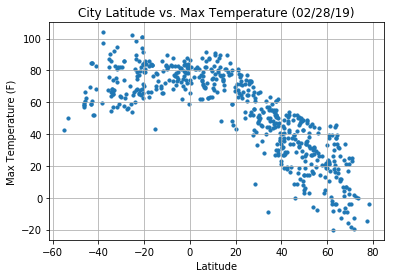

In [34]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
today = datetime.date.today()
plt.title(f"City Latitude vs. Max Temperature ({today:%m/%d/%y})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.grid(True)

# Save the figure
plt.savefig("./Output/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

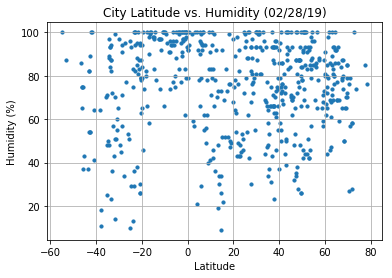

In [35]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
today = datetime.date.today()
plt.title(f"City Latitude vs. Humidity ({today:%m/%d/%y})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid(True)

# Save the figure
plt.savefig("./Output/City Latitude vs. Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

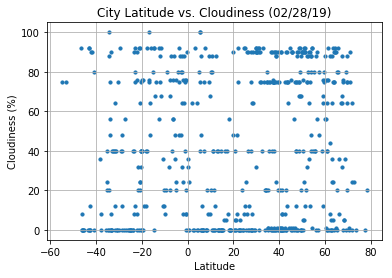

In [36]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
today = datetime.date.today()
plt.title(f"City Latitude vs. Cloudiness ({today:%m/%d/%y})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.grid(True)

# Save the figure
plt.savefig("./Output/City Latitude vs. Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

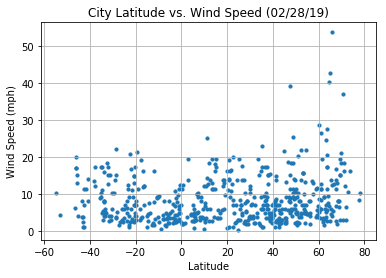

In [37]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
today = datetime.date.today()
plt.title(f"City Latitude vs. Wind Speed ({today:%m/%d/%y})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.grid(True)

# Save the figure
plt.savefig("./Output/City Latitude vs. Wind Speed.png")

# Show plot
plt.show()